# K-Means Clustering: Unsupervised Learning

K-means trennt unlabeled Data in Cluster nach Gemeinsamkeiten auf. K steht für die Anzahl der Cluster. In dem Beispiel unterscheiden wir 2 Arten von Cricket Spielern: Den Feldspielern, und den Torwarten. 

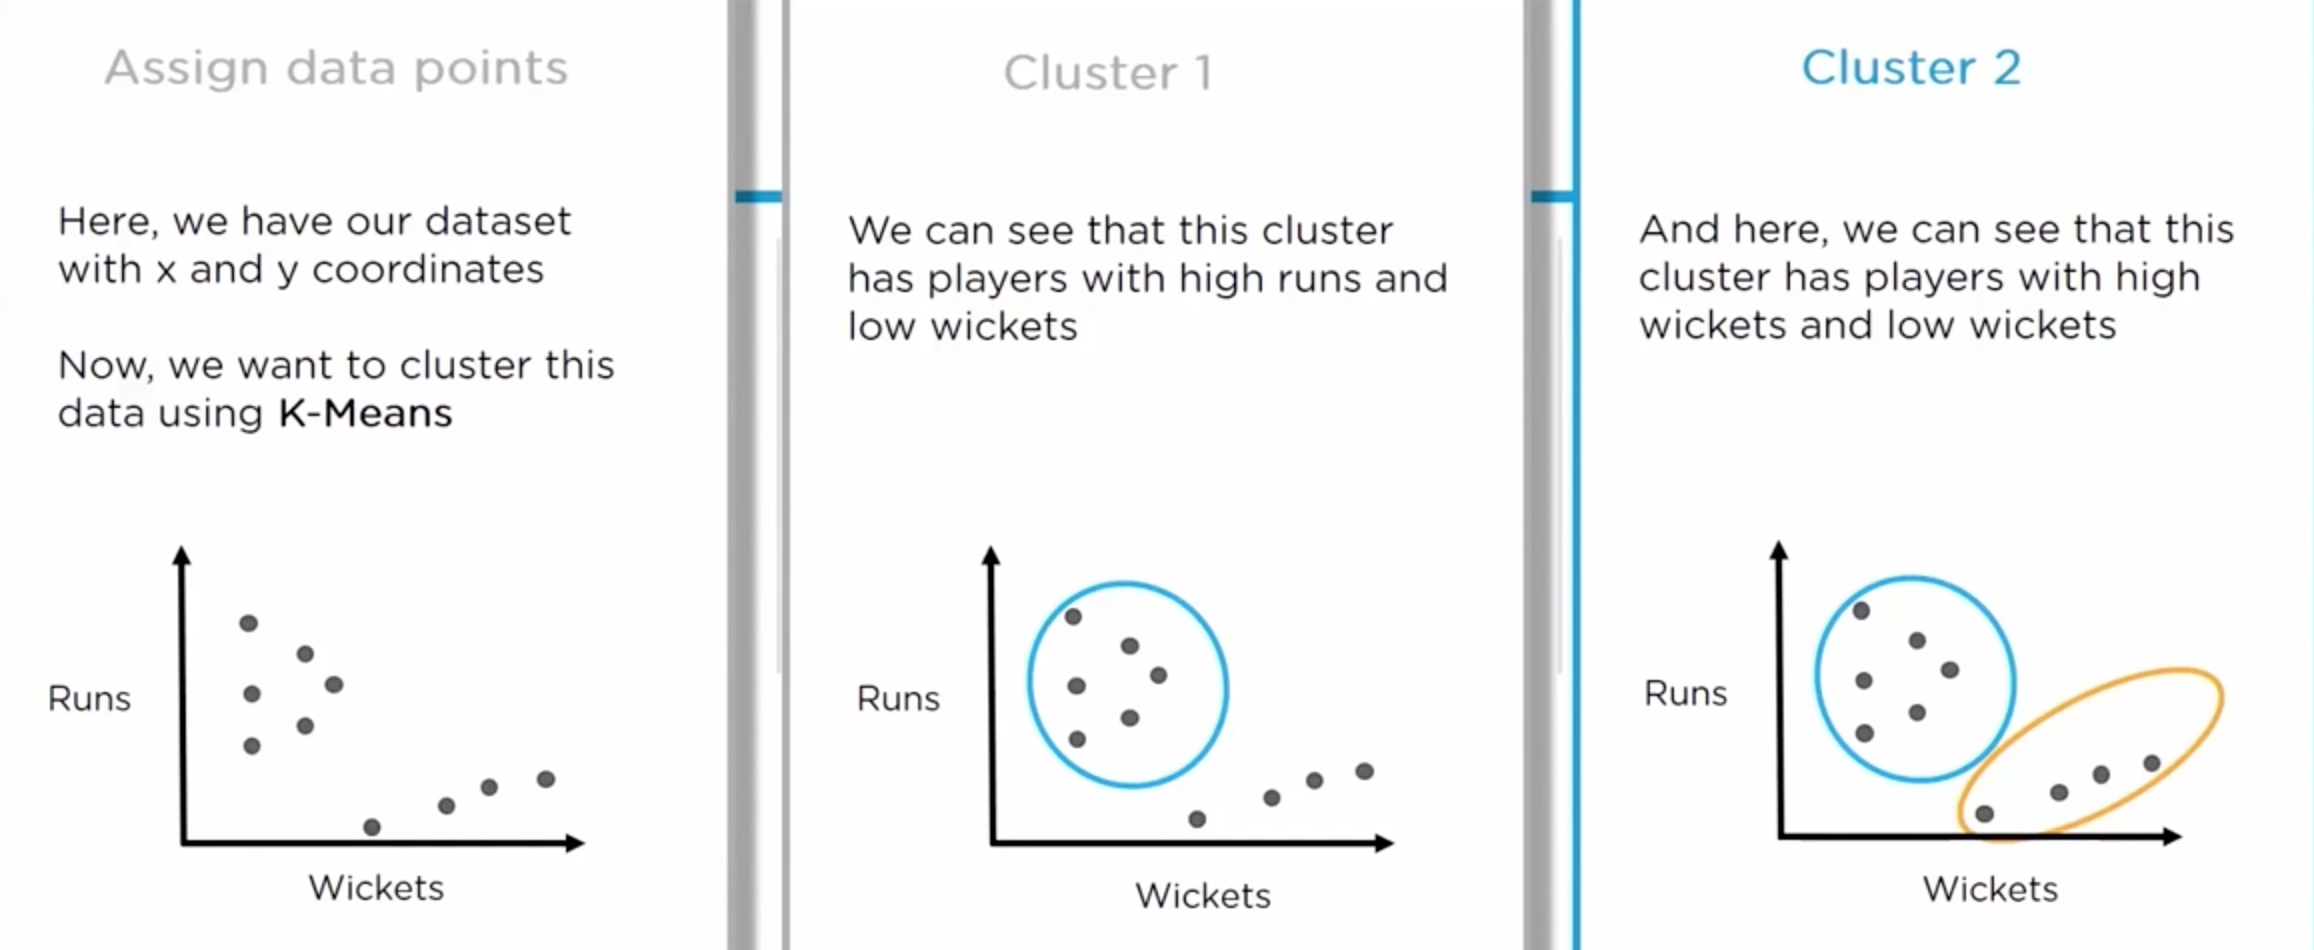

In [18]:
from IPython.display import Image
Image(filename = './kmeans.png')

Der K-Means Algorithmus wird zuerst randomly 2 centeroids (Kerne) auswählen. Anhand der Euklidischen Distanz der anderen Punkte zum Centeroid wird der ECHTE Kern in einem iterativen Prozess ermittelt: Es ist der Punkt, mit der kleinsten mittleren Distanzen zum Rest der Cluster.

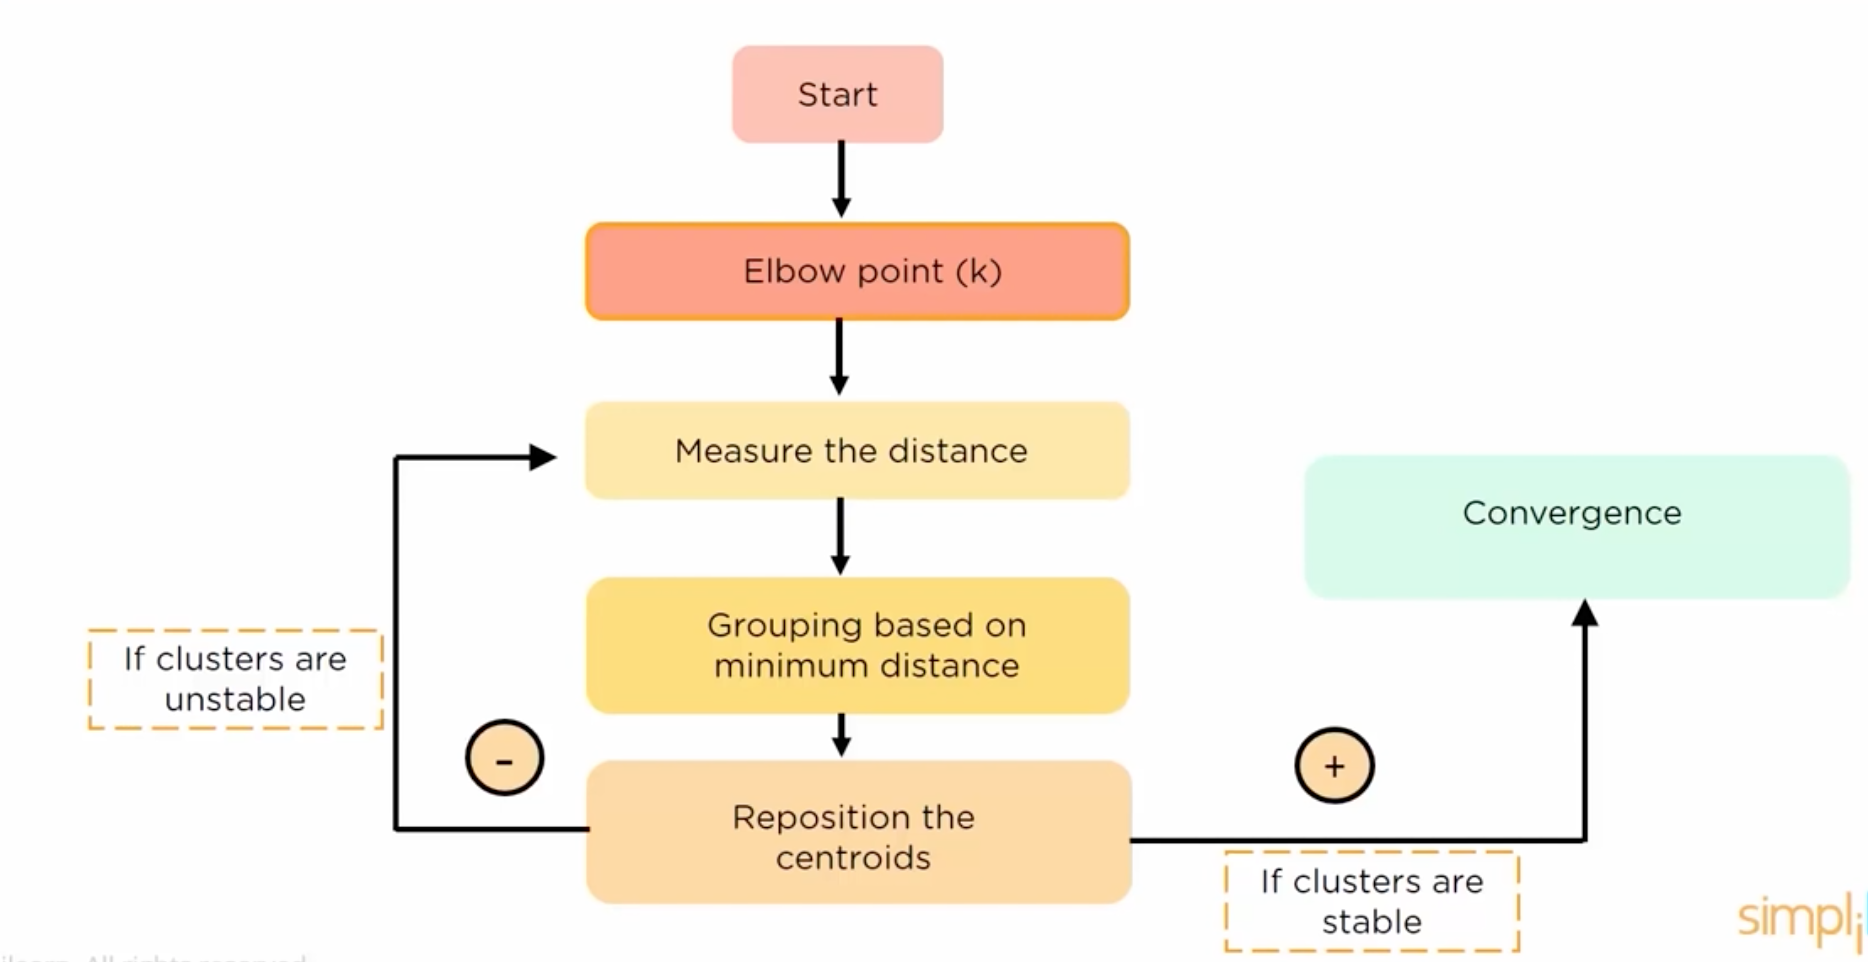

In [19]:
Image(filename = './kmeansflow.png')

1. Im Elbow werden die K's festgelegt 
2. danach werden die Centeroids ausgewählt 
3. und die Datenpunkte zugeordnet (Grouping)
4. Im Iterativen Prozess werden die Clusters evaluiert

Wenn der Algorithmus Konvergiert, hat man die Lösung gefunden. Ist das Clustering instabil, wird der Prozess wiederholt

# Beispiel: Optimale Location auf einer Karte finden

Ein Walmart soll in Florida eröffnen, wir wollen nach der meisten potentiellen Kundschaft nach einem idealen Ort auf der Karte suchen, wo der Laden eröffnen wird,

In [20]:
import seaborn as sns, numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

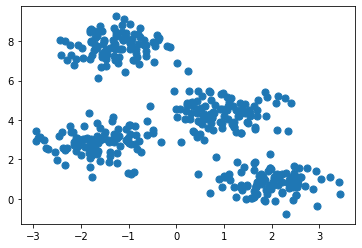

In [21]:
#1. cluster randomly anlegen
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 50)

# K-Means Clustering:

In [22]:
#2. vier Cluster festlegen // C = c1, c2, ... c k
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4) #// arg min dist(ci, x)^2 /ci summe C
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

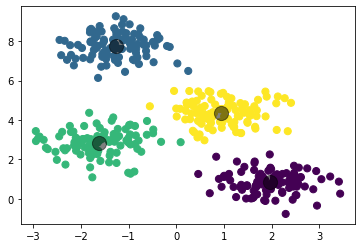

In [28]:
#3. cluster finden // ci = 1/Si / Summe der xi
from sklearn.metrics import pairwise_distances_argmin

#4. 2&3 loopen, dabei randomly chosen clusters assignen 
def find_clusters(X, n_clusters, rseed = 2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        #label vergeben, je nach nächstem centeroid
        labels = pairwise_distances_argmin(X,centers)
    
        #neue centeroids aus den datenpunkten nehmen und loopen
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        #nach convergenz suchen und break
        if np.all(centers == new_centers):
            break
        centers = new_centers 
        
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap ='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)

In [40]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import matplotlib; print("Matplot", matplotlib.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)   

macOS-10.16-x86_64-i386-64bit
Python 3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]
NumPy 1.20.1
Matplot 3.3.4
SciPy 1.6.2
Scikit-Learn 0.24.1


# Beispiel 2: Image Processing, Color compression

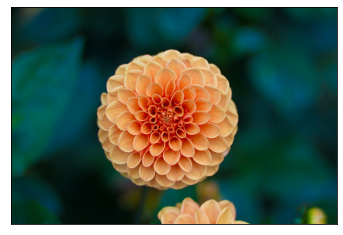

In [32]:
from sklearn.datasets import load_sample_image
flower = load_sample_image('flower.jpg')
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(flower)

In [33]:
#dimensionen des Bildes, pixels und 3 hauptfarben
flower.shape

(427, 640, 3)

In [37]:
flower #vor dem reshapen

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [35]:
#flatten the array
data = flower/255.0 #01 scale
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

In [36]:
data #nach dem reshapen

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

# Visualisiere die Pixels

In [41]:
def plot_pixels(data, title, colors = None, N = 10000):
    if colors is None:
        colors = data
        
    #random subsets anlegen:
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    #grafiken plotten, beschreiben 1x red vs green & red vs. blue
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color = colors, marker = '.') #xlimits, ylimits
    ax[0].set(xlabel = 'Red', ylabel = 'Green', xlim = (0,1), ylim = (0,1))
    ax[1].scatter(R , B, color = colors, marker = '.')
    ax[1].set(xlabel = 'Red', ylabel = 'Blue', xlim = (0,1), ylim = (0,1))
    
    fig.suptitle(title, size = 15)

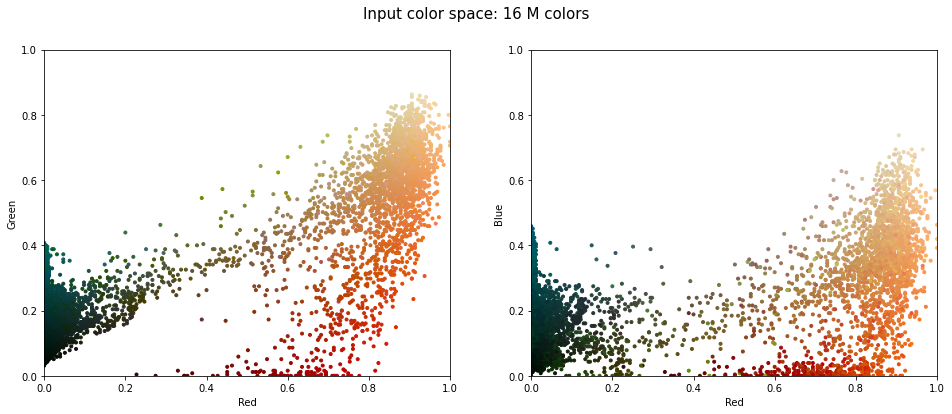

In [42]:
plot_pixels(data, title = 'Input color space: 16 M colors')

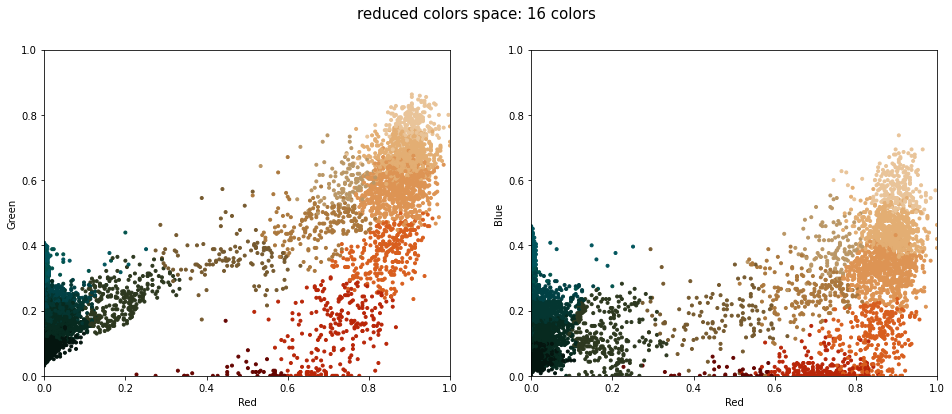

In [45]:
#fix numpy
import warnings; warnings.simplefilter('ignore') 

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]


plot_pixels(data, colors = new_colors, title = 'reduced colors space: 16 colors')

Text(0.5, 1.0, '16-colors image')

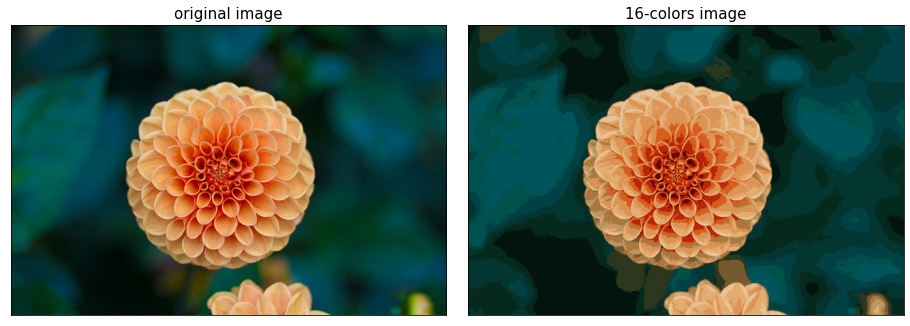

In [48]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize = (16, 6), subplot_kw = dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(flower)
ax[0].set_title('original image', size = 15)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-colors image', size = 15)